In [1]:
# work with the Reuters dataset
# Get the 10000 most frequently occuring words found in the data
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# number of training_data
len(train_data)

8982

In [3]:
# number of testing data
len(test_data)

2246

In [4]:
# Check what is inside the data
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# labels associated with an example is an integer between 0 and 45
train_labels[10]

3

In [7]:
# Prepare the data
# Vectorize the data with 0s and 1s, same as what we do in 3.4
# We need to vectorize the labels
import numpy as np
# vectorize the train_data and test_data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train)
print(x_test)
# Vectorize the labels, dimension is 46 because index 45 is out of bounds for axis 1 with size 45
def vectorize_labels(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, labels in enumerate(labels):
        results[i, labels] = 1
    return results
x_train_labels = vectorize_labels(train_labels)
x_test_labels = vectorize_labels(test_labels)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [8]:
# Building the network
from keras import models
from keras import layers
model = models.Sequential()
# Use larger layers to separate 46 different class
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) 
# labels, use softmax to find the probability distribution of 46 labels, the scores will sum to 1
model.add(layers.Dense(46, activation='softmax')) 

In [9]:
# The best function to use in this case is categorical_crossentropy. (Stated in the book)
# It measures the distance between two probability distributions.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Validating the approach, use the first 1000 data as validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = x_train_labels[:1000]
partial_y_train = x_train_labels[1000:]

In [11]:
# Train the network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 184us/step - loss: 2.7085 - accuracy: 0.5266 - val_loss: 1.8070 - val_accuracy: 0.6430
Epoch 2/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.4617 - accuracy: 0.7018 - val_loss: 1.3418 - val_accuracy: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0786 - accuracy: 0.7663 - val_loss: 1.1315 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.8479 - accuracy: 0.8178 - val_loss: 1.0276 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.6792 - accuracy: 0.8550 - val_loss: 0.9726 - val_accuracy: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.5432 - accuracy: 0.8861 - val_loss: 0.9183 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 108us/step - loss: 0

In [12]:
# Check the key of the object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

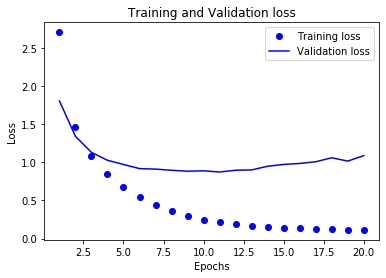

In [14]:
# Plotting the training and validation loss
# add this to show the graph
%matplotlib inline
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

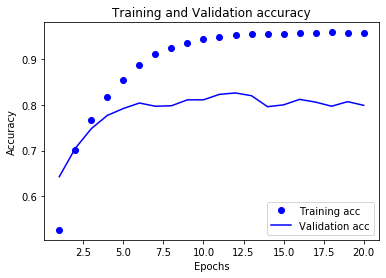

In [15]:
# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Overfitfing after nine epochs. (Show in the graph)

In [16]:
# Train a new network for 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# epochs reduce to 9
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 121us/step - loss: 2.7119 - accuracy: 0.4766 - val_loss: 1.8050 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 119us/step - loss: 1.4535 - accuracy: 0.7066 - val_loss: 1.3266 - val_accuracy: 0.7030
Epoch 3/9
7982/7982 [==============================] - 1s 136us/step - loss: 1.0550 - accuracy: 0.7815 - val_loss: 1.1211 - val_accuracy: 0.7620
Epoch 4/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.8157 - accuracy: 0.8329 - val_loss: 1.0294 - val_accuracy: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s 112us/step - loss: 0.6510 - accuracy: 0.8685 - val_loss: 0.9742 - val_accuracy: 0.7870
Epoch 6/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.5195 - accuracy: 0.8955 - val_loss: 0.9127 - val_accuracy: 0.8190
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.418

In [19]:
results = model.evaluate(x_test, x_test_labels)
results
# accuracy reaches about 80%

2246/2246 [==============================] - 0s 126us/step


[0.9841167151874872, 0.7853962779045105]

In [21]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hit_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hit_array)) / len(test_labels)

0.188780053428317

In [22]:
# Generating predicitons on new data
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
# return the class with the highest probability
np.argmax(predictions[0])

3